In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Data
Split given training data into the following split:
- 80% Training set
- 20% Cross Validation Set

In [19]:
df_all = pd.read_excel('train.xlsx')
df = df_all.drop(columns = ['Name', 'Cabin', 'Ticket'])

# one hot encoding for all categorical values
cat_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df = pd.get_dummies(data= df, prefix=cat_variables, columns=cat_variables)

# get all columns that will be used as features, rmove target column to prepare for splitting
features = [ x for x in df.columns if x not in 'Survived']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], 
                                                    train_size=0.8, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
331,726,20.0,8.6625,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
733,146,19.0,36.7500,False,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
382,869,NaN,9.5000,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
704,154,40.5,14.5000,False,False,True,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
813,121,21.0,73.5000,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,371,25.0,55.4417,True,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
270,855,44.0,26.0000,False,True,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
860,434,17.0,7.1250,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
435,191,32.0,13.0000,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True


,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
709,272,25.0,0.0000,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
439,643,2.0,27.9000,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
840,364,35.0,7.0500,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
720,708,42.0,26.2875,True,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
39,763,20.0,7.2292,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,64,4.0,27.9000,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
773,119,24.0,247.5208,True,False,False,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
25,382,1.0,15.7417,False,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
84,249,37.0,52.5542,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True


331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Decision Tree Modeling

## Hyper Parameter Tuning

Will be investigating the parameters:
- minimum samples split (min number of samples required to split node)
- max depth

*Note that number of features is another hyperparameter that could be tuned in decision tree models, but will not be explored here

In [21]:
min_samples_split_list = [2, 5, 8, 10, 20, 30, 40, 60, 80, 100, 120, 200, 300]
max_depth_list = [2, 3, 4, 5, 7, 8, 10, 12, 16, 32, 64, 100, 150, 200, 250, None]

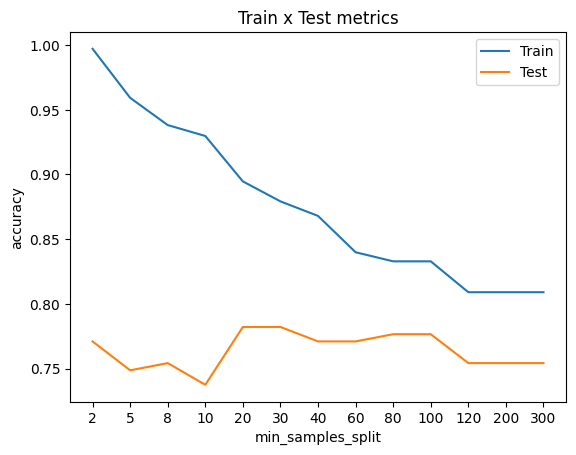

In [22]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_test = accuracy_score(prediction_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])


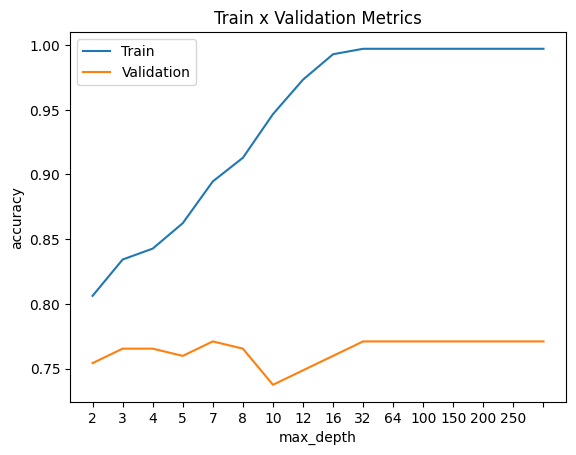

In [23]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_test = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation Metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Validation'])


According to the data, the best choice for the hyperparameters are:
- min_samples_split = 100
- max_depth = 7

In [24]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=100,
                                             max_depth=7,
                                             random_state=42).fit(X_train, y_train)

print(f"Metrics train: Accuracy Score: {accuracy_score(decision_tree_model.predict(X_train), y_train):.4f}")
print(f"Metrics test: Accuracy Score: {accuracy_score(decision_tree_model.predict(X_test), y_test):.4f}")

Metrics train: Accuracy Score: 0.8329
Metrics test: Accuracy Score: 0.7765


Slight sign of Bias. Could be fixed with more data samples. Note that none of the accuracy graphs for train and validation data intersected therefore its not surprising that the results were not super close to each other.

# Random Forest Modeling

## Hyperparameter Tuning

- Same hyperparameters found in decision tree models with aditional one called `n_estimators`. This is the number of decision trees that make up the forest


In [25]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700, 1000]
    # Note the if numbers are intergers then it is the actual quantity of samples
    # if its a float, then it represets the percentage of the dataset
max_depth_list = [2, 3, 4, 5, 7, 8, 10, 12, 16, 32, 64, 100, 150, 200, 250, None]
n_estimators_list = [10, 50, 100, 500]

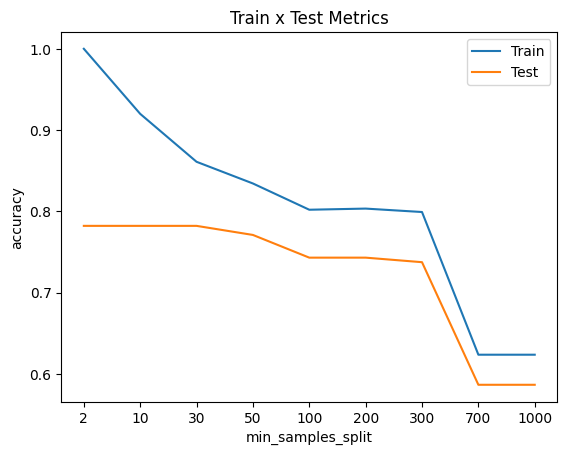

In [26]:
# Tuning for n_estimators (number of trees)
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train) #predicted values for the training set
    prediction_test = model.predict(X_test) # predicted values for the test set
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_test = accuracy_score(prediction_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test Metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])

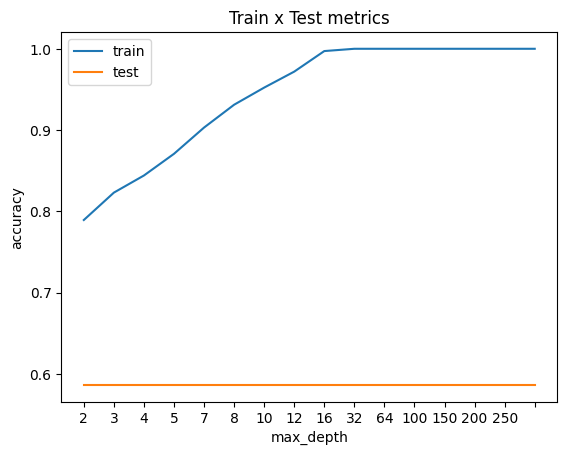

In [27]:
# Tuning for max depth
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_test = accuracy_score(prediction_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['train', 'test'])




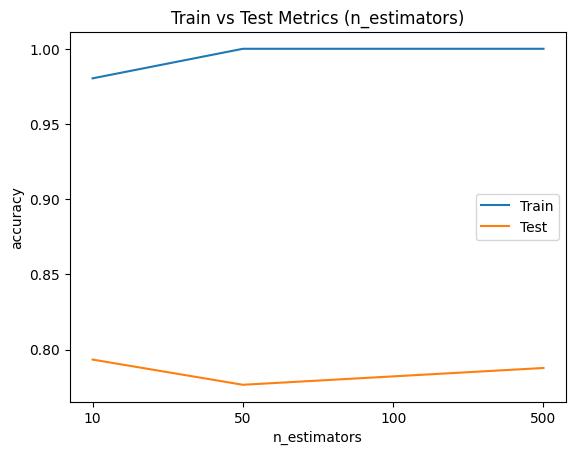

In [30]:
# tuning for n_estimators
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_test = accuracy_score(prediction_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title("Train vs Test Metrics (n_estimators)")
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])

In [32]:
# Random Forest with tuned Hyperparameters
random_forest_model = RandomForestClassifier(n_estimators=10, min_samples_split=300, max_depth=16)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=300, n_estimators=10)

In [34]:
# Accuracy
accuracy_model_train = accuracy_score(model.predict(X_train), y_train)
accuracy_model_test = accuracy_score(model.predict(X_test), y_test)

print(f"Accuracy of model using train set: {accuracy_model_train:.4f}")
print(f"Accuracy of model on test set: {accuracy_model_test:4f}")

Accuracy of model using train set: 1.0000
Accuracy of model on test set: 0.787709


In [ ]:
""""
There is overfitting according to the accuracy results. Some ways to improve accuracy score is
- more data
- add regularization*
- simpler model
Most likely caused by a small data set, but could be fixed with regularization. There are already small number of features as is.
"""

#  XGBoost

Instead of the trees being uncorrelated to one another (like in the random forest model), here the trees fit one after the other, minimizing error each time.

Model has same parameters as the decision tree plus the learning rate.
- Learning rate is the size of the step of the gradient descent used in XGBoost

Model has a threshold that helps minimize number of n_estimators (more trees can result into overfitting). Once a certain threshold of cost where is has stopped decreasing (or its decreasing a very small amount) has been reached, training will stop.

In [46]:
# From the training set, we split to 80% training and 20% evaluation Set
n = int(len(X_train)*0.8)
X_train, y_train, X_val, y_val = X_train[:n], y_train[:n], X_train[n:], y_train[n:]


In [50]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbose = 1, random_state=42, early_stopping_rounds = 10)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.61139
[1]	validation_0-logloss:0.58273
[2]	validation_0-logloss:0.55740
[3]	validation_0-logloss:0.53609
[4]	validation_0-logloss:0.52231
[5]	validation_0-logloss:0.50968
[6]	validation_0-logloss:0.49783
[7]	validation_0-logloss:0.49108
[8]	validation_0-logloss:0.48435
[9]	validation_0-logloss:0.47803
[10]	validation_0-logloss:0.47541
[11]	validation_0-logloss:0.47074
[12]	validation_0-logloss:0.46875
[13]	validation_0-logloss:0.46544
[14]	validation_0-logloss:0.46414
[15]	validation_0-logloss:0.46447
[16]	validation_0-logloss:0.46372
[17]	validation_0-logloss:0.46265
[18]	validation_0-logloss:0.46240
[19]	validation_0-logloss:0.46148
[20]	validation_0-logloss:0.46303
[21]	validation_0-logloss:0.46527
[22]	validation_0-logloss:0.46585
[23]	validation_0-logloss:0.46839
[24]	validation_0-logloss:0.46894
[25]	validation_0-logloss:0.46957
[26]	validation_0-logloss:0.46995
[27]	validation_0-logloss:0.47147
[28]	validation_0-logloss:0.47399
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
xgb_model.best_iteration

19

In [55]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9069
Metrics test:
	Accuracy score: 0.7765
